In [1]:
import pandas as pd
import os

import datascript
from utils import plot_predictions


In [2]:
target_labels=["GWAP","LWAP"] 
regionnames=["LUZ","VIS","MIN"]
islands = ["Luzon","Visayas","Mindanao"]
appendix = True

In [3]:
output_base_folder = os.path.dirname(os.path.abspath(datascript.__file__)) 
plotfolder = os.path.join(output_base_folder, "Graphs")
predsfolder= os.path.join(output_base_folder, "Preds")
os.makedirs(plotfolder, exist_ok=True)

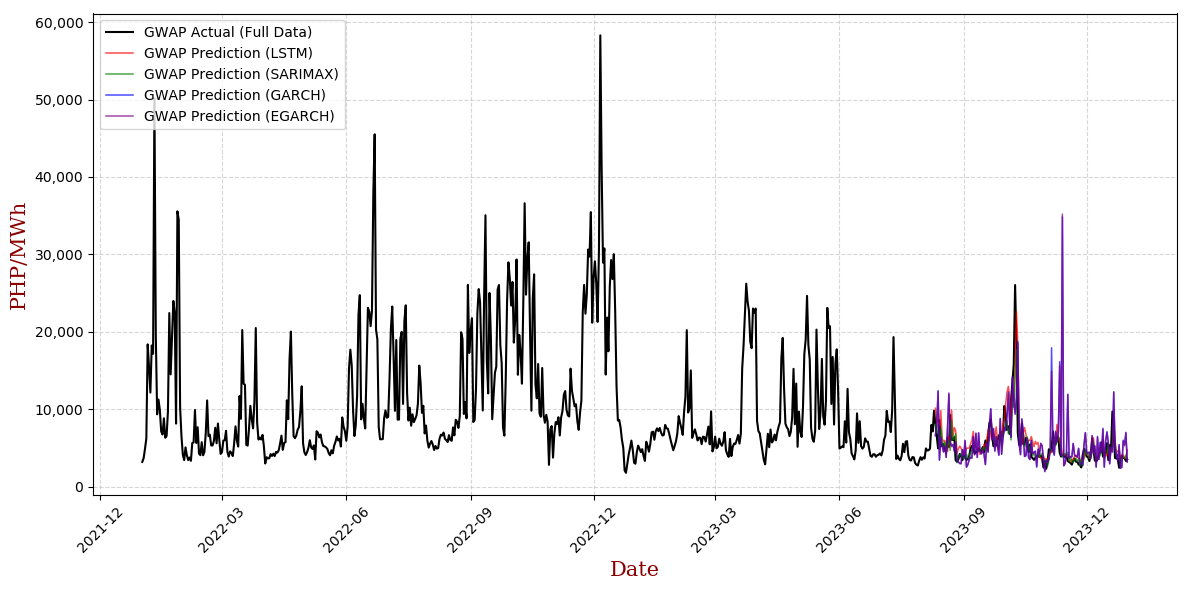

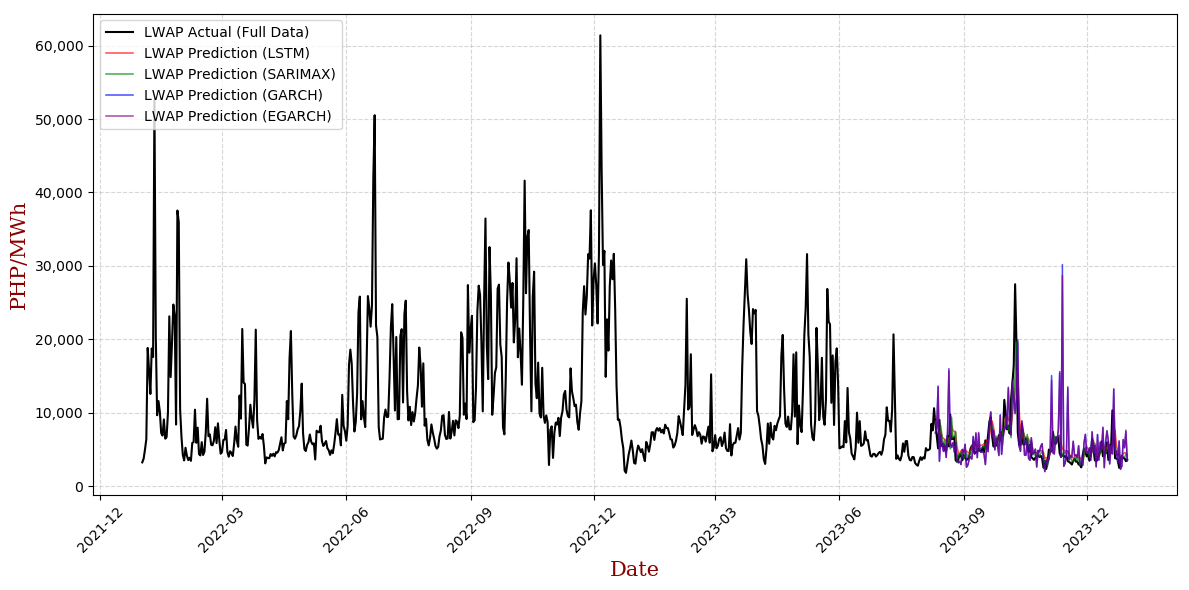

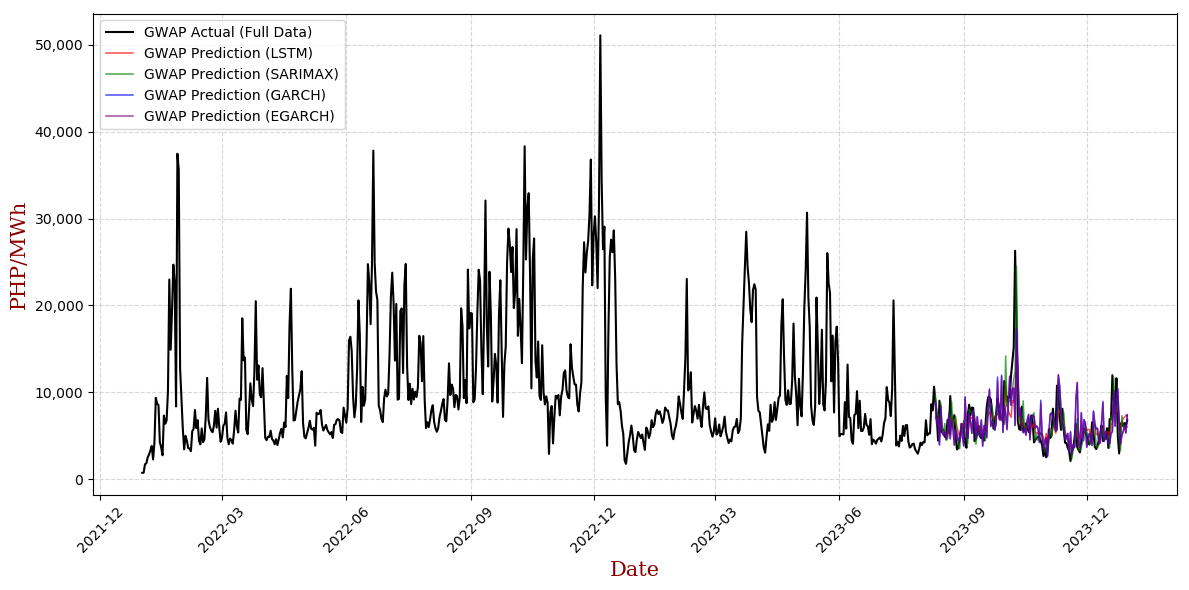

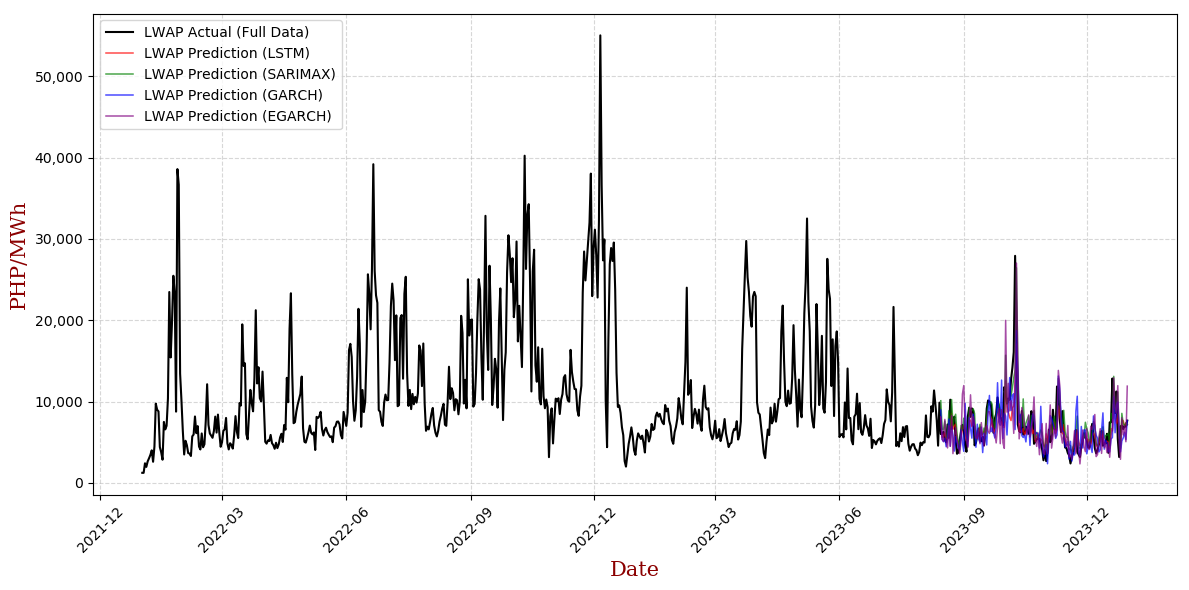

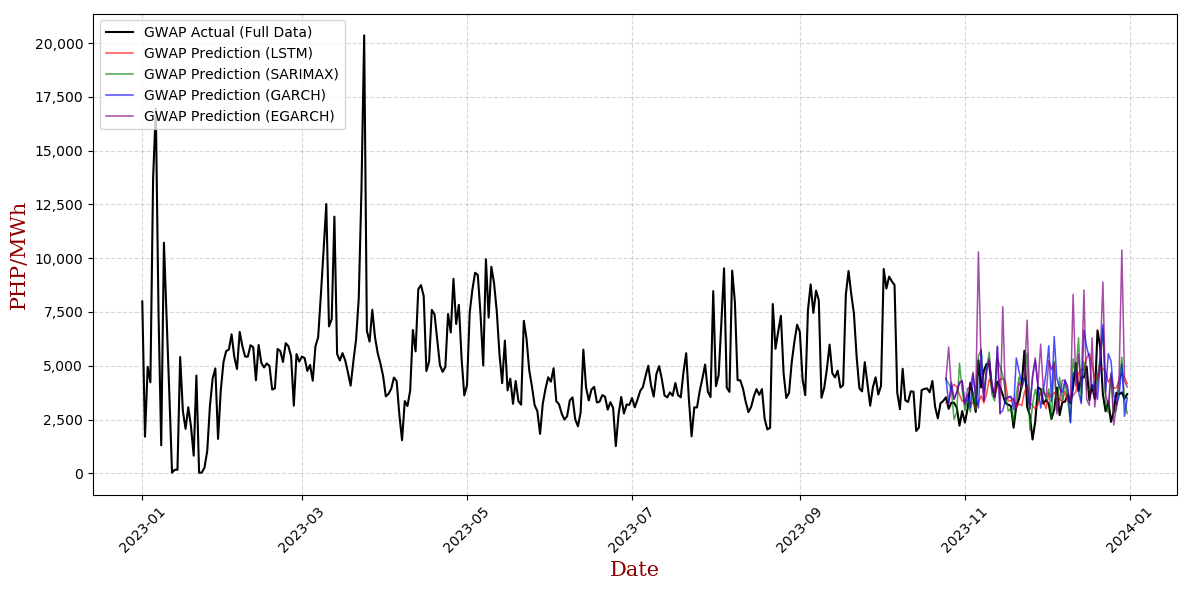

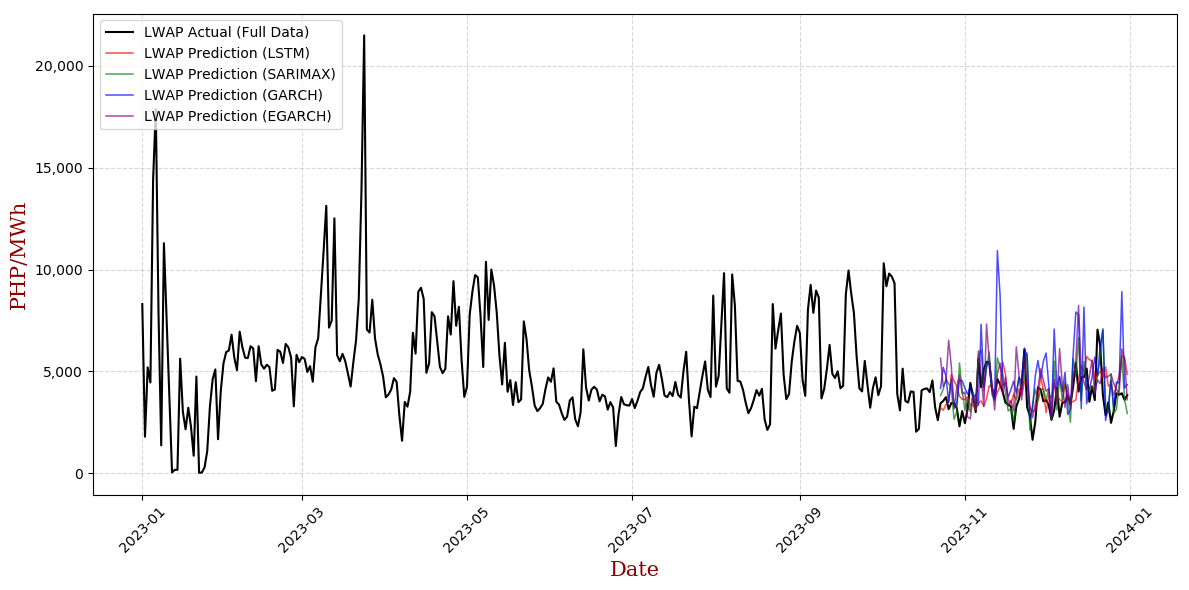

In [4]:
for regionname in regionnames:
        island = "Luzon" if regionname == "LUZ" else "Visayas" if regionname == "VIS" else "Mindanao"
        for target_label in target_labels:

            graph = os.path.join(plotfolder, f"{island}")
            actual_values = datascript.load_data(regionname,target_label,False,False)
            lstmpreds = pd.read_csv(os.path.join(predsfolder, "LSTM",f"{regionname}-{target_label}-predictions.csv")).values
            sarimaxpreds = pd.read_csv(os.path.join(predsfolder, "SARIMAX",f"{regionname}-{target_label}-predictions.csv")).values
            garchpreds = pd.read_csv(os.path.join(predsfolder, "GARCH",f"{regionname}-{target_label}-predictions-garch.csv")).iloc[:, 1].values
            egarchpreds = pd.read_csv(os.path.join(predsfolder, "GARCH",f"{regionname}-{target_label}-predictions-egarch.csv")).iloc[:, 1].values
            preds ={'LSTM':lstmpreds,'SARIMAX':sarimaxpreds,'GARCH':garchpreds,'EGARCH':egarchpreds}
            plot_predictions(
                actual_values, 
                target_label,
                island,
                graph,
                appendix,
                **preds
            )